In [1]:
import psycopg2 as sql

In [2]:
try: 
    conn=sql.connect(user="postgres", password="constantine",
                                  host="127.0.0.1",
                                  port="5432",
                                  database="udacity")
except sql.Error as e:
    print("can not have connection to database")

In [3]:
try:
    cur=conn.cursor()
except sql.Error as e:
    print("can not get cursor of connection")

In [4]:
conn.set_session(autocommit=True)

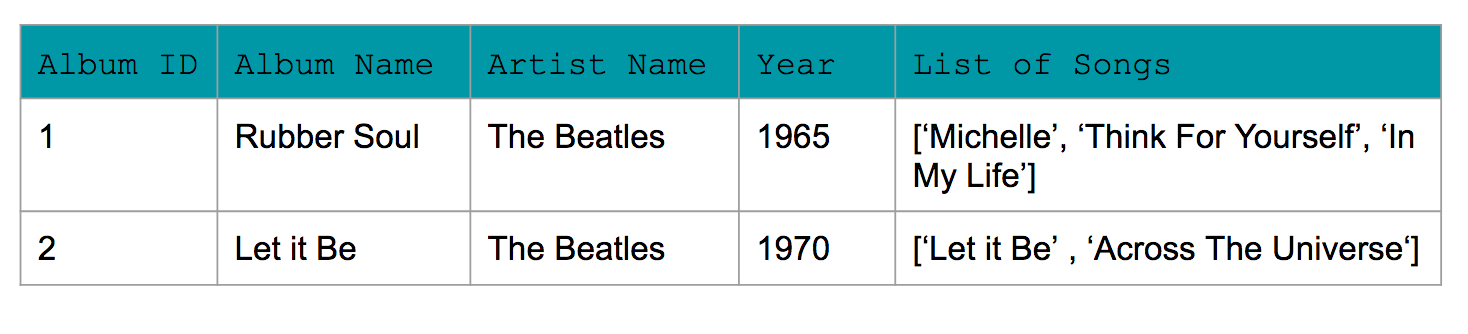

In [5]:
try:
    cur.execute("drop table music_lib")
    cur.execute("create table if not exists \
    music_lib (albumId int,albumName varchar ,\
    artistName varchar,year int,songs text[]);")
except sql.Error as e:
    print("couldn't create the table")
    print (e)

In [6]:
try:
    cur.execute("insert into music_lib (albumId,albumName,artistName, \
    year,songs) values(%s,%s,%s,%s,%s)",\
    (1,"Rubber Soul","The Beatles",1965,["Michelle","Think For Yourself","In My Life"]))
    
    cur.execute("insert into music_lib (albumId,albumName,artistName, \
    year,songs) values(%s,%s,%s,%s,%s)",\
    (1,"Let it be","The Beatles",1970,["Let it be","Across the universe"]))

except sql.Error as e:
    print("couldn't insert into the table")
    print(e)

In [7]:
try:
    cur.execute("select * from music_lib")
except sql.Error as e: 
    print("couldn't insert into the table")
    print(e)
row=cur.fetchone()
while(row):
    print(row)
    row=cur.fetchone()

(1, 'Rubber Soul', 'The Beatles', 1965, ['Michelle', 'Think For Yourself', 'In My Life'])
(1, 'Let it be', 'The Beatles', 1970, ['Let it be', 'Across the universe'])


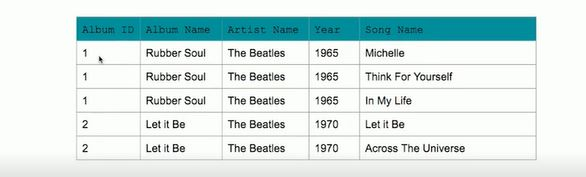

In [8]:
# normalizing the table 
# 1st normal form
try:
    cur.execute("drop table music_lib2")
    cur.execute("create table if not exists \
    music_lib2 (albumId int,albumName varchar ,\
    artistName varchar,year int,songName varchar);")
except sql.Error as e:
    print("couldn't create the table")
    print (e)

In [9]:
try:
    cur.execute("insert into music_lib2 (albumId,albumName,artistName, \
    year,songName) values(%s,%s,%s,%s,%s)",\
    (1,"Rubber Soul","The Beatles",1965,"Michelle"))

    cur.execute("insert into music_lib2 (albumId,albumName,artistName, \
    year,songName) values(%s,%s,%s,%s,%s)",\
    (1,"Rubber Soul","The Beatles",1965,"Think for your self"))
    
    cur.execute("insert into music_lib2 (albumId,albumName,artistName, \
    year,songName) values(%s,%s,%s,%s,%s)",\
    (2,"Let it be","The Beatles",1965,"In my Life"))
    
    cur.execute("insert into music_lib2 (albumId,albumName,artistName, \
    year,songName) values(%s,%s,%s,%s,%s)",\
    (2,"let it be","the beatles",1970,"let it be"))
    
    cur.execute("insert into music_lib2 (albumId,albumName,artistName, \
    year,songName) values(%s,%s,%s,%s,%s)",\
    (2,"let it be","the beatles",1970,"Across the universe"))

except sql.Error as e:
    print("couldn't insert into the table")
    print(e)

In [10]:
try:
    cur.execute("select * from music_lib2")
except sql.Error as e: 
    print("couldn't insert into the table")
    print(e)
row=cur.fetchone()
while(row):
    print(row)
    row=cur.fetchone()

(1, 'Rubber Soul', 'The Beatles', 1965, 'Michelle')
(1, 'Rubber Soul', 'The Beatles', 1965, 'Think for your self')
(2, 'Let it be', 'The Beatles', 1965, 'In my Life')
(2, 'let it be', 'the beatles', 1970, 'let it be')
(2, 'let it be', 'the beatles', 1970, 'Across the universe')


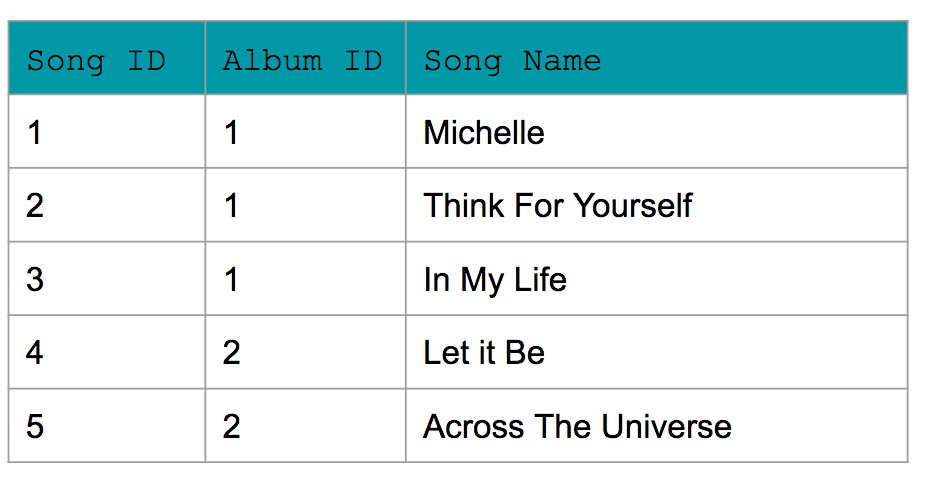

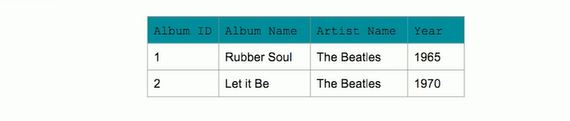

In [11]:
# normalizing the table 
# 2nd normal form
try:
    cur.execute("drop table songs")
    cur.execute("create table if not exists songs (songId int,songName varchar ,albumId int);")
    
    cur.execute("drop table music_lib3")
    cur.execute("create table if not exists music_lib3 (albumId int,albumName varchar ,artistName varchar,year int);")
except sql.Error as e:
    print("couldn't create the table")
    print (e)

In [12]:
try:
    cur.execute("insert into music_lib3 (albumId,albumName,artistName,year) values(%s,%s,%s,%s)",\
    (1,"Rubber Soul","The Beatles",1965))

    cur.execute("insert into music_lib3 (albumId,albumName,artistName,year) values(%s,%s,%s,%s)",\
    (2,"let it be","the beatles",1970))
    
    cur.execute("insert into songs (songId,albumId,songName) values(%s,%s,%s)",\
    (1,1,"Michelle"))

  
    cur.execute("insert into songs (songId,albumId,songName) values(%s,%s,%s)",\
    (1,2,"Acroos the unoverse"))

except sql.Error as e:
    print("couldn't insert into the table")
    print(e)

In [13]:
try:
    cur.execute("select * from songs")
except sql.Error as e: 
    print("couldn't insert into the table")
    print(e)
row=cur.fetchone()
while(row):
    print(row)
    row=cur.fetchone()

try:
    cur.execute("select * from music_lib3")
except sql.Error as e: 
    print("couldn't insert into the table")
    print(e)
row=cur.fetchone()
while(row):
    print(row)
    row=cur.fetchone()

(1, 'Michelle', 1)
(1, 'Acroos the unoverse', 2)
(1, 'Rubber Soul', 'The Beatles', 1965)
(2, 'let it be', 'the beatles', 1970)


In [14]:

try:
    cur.execute("select * from music_lib3 join songs on\
    music_lib3.albumId=songs.albumId;")
except sql.Error as e: 
    print("couldn't insert into the table")
    print(e)
row=cur.fetchone()
while(row):
    print(row)
    row=cur.fetchone()

(1, 'Rubber Soul', 'The Beatles', 1965, 1, 'Michelle', 1)
(2, 'let it be', 'the beatles', 1970, 1, 'Acroos the unoverse', 2)


In [15]:
# normalizing the table 
# 3rd normal form
try:
    #cur.execute("drop table music_lib4")
    cur.execute("create table if not exists music_lib4 (albumId int,albumName varchar ,artistId int,year int);")
    
   # cur.execute("drop table music_lib4")
    cur.execute("create table if not exists artists (artistId int,artistName varchar);")
    
    
except sql.Error as e:
    print("couldn't create the table")
    print (e)

In [16]:
try:
    cur.execute("insert into artists (artistId,artistName) values(%s,%s)",\
    (1,"The Beatles"))

    cur.execute("insert into music_lib4 (albumId,albumName,artistId,year) values(%s,%s,%s,%s)",\
    (1,"Rubber Soul",1,1965))

    cur.execute("insert into music_lib4 (albumId,albumName,artistId,year) values(%s,%s,%s,%s)",\
    (2,"let it be",1,1970))
    
except sql.Error as e:
    print("couldn't insert into the table")
    print(e)

In [17]:
try:
    cur.execute("select * from music_lib4 join songs on\
    music_lib4.albumId=songs.albumId join artists on music_lib4.artistId=artists.artistId ;")
except sql.Error as e: 
    print("couldn't insert into the table")
    print(e)
row=cur.fetchone()
while(row):
    print(row)
    row=cur.fetchone()

(1, 'Rubber Soul', 1, 1965, 1, 'Michelle', 1, 1, 'The Beatles')
(1, 'Rubber Soul', 1, 1965, 1, 'Michelle', 1, 1, 'The Beatles')
(2, 'let it be', 1, 1970, 1, 'Acroos the unoverse', 2, 1, 'The Beatles')
(2, 'let it be', 1, 1970, 1, 'Acroos the unoverse', 2, 1, 'The Beatles')
(1, 'Rubber Soul', 1, 1965, 1, 'Michelle', 1, 1, 'The Beatles')
(1, 'Rubber Soul', 1, 1965, 1, 'Michelle', 1, 1, 'The Beatles')
(2, 'let it be', 1, 1970, 1, 'Acroos the unoverse', 2, 1, 'The Beatles')
(2, 'let it be', 1, 1970, 1, 'Acroos the unoverse', 2, 1, 'The Beatles')


In [18]:
#closing connection to database
cur.close()
conn.close()